/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd
df3=pd.read_csv(r'/content/drive/MyDrive/risks03.csv',encoding="utf-8")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df2=pd.read_csv(r'/content/drive/MyDrive/risks02.csv',encoding="utf-8")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1=pd.read_csv(r'/content/drive/MyDrive/risks01.csv',encoding="utf-8")

In [ ]:
df = pd.concat([df1, df2, df3], axis=0, join='inner')

In [ ]:
df.shape

In [ ]:
#removing the non str values prior to the creation of embeddings
lis1a=df3['10k_risks1A']
lis1aa=[]
for i in lis1a:
    if(type(i)==str):
        lis1aa.append(i)
print(len(lis1aa))
lis1aa=lis1aa[10000:]  #number of observations to be tested

In [ ]:
len(lis1aa)

In [ ]:
lis1aa[0]

In [ ]:
#d
#split the components of lis1aa into paagraphs
# eg=lis1aa[1]
# def remove_words(text, words_to_remove):
#     # Split the text into words
#     words = text.split(' ')

#     # Create a list of words that are not in the words_to_remove list
#     filtered_words = [word for word in words if word not in words_to_remove]

#     # Join the filtered words back into a single string
#     cleaned_text = ' '.join(filtered_words)

#     return cleaned_text

# Example usage:
# eg=lis1aa[2]
# paragraph = eg
# phrases_to_remove = ["##TABLE_START", "##TABLE_END", "##TABLE_END", "&#8226;","&#183;","FDA&#8217;s"]
# #phrases_to_remove = ["##TABLE_START &#160; &#149; &#160;", "##TABLE_END &#160;", "##TABLE_END", "&#8226;"]
# cleaned_paragraph = remove_phrases(paragraph, phrases_to_remove)
# print(cleaned_paragraph)


In [ ]:
#better
#d
import re

def remove_phrases(text, phrases_to_remove):
    cleaned_text = text
    for phrase in phrases_to_remove:
        cleaned_text = cleaned_text.replace(phrase, '')
    return cleaned_text

# Example usage:
eg=lis1aa[2]
paragraph = eg
phrases_to_remove = ["##TABLE_START", "##TABLE_END &#160;", "##TABLE_END", "&#8226;","&#183;","FDA&#8217;s"]
#phrases_to_remove = ["##TABLE_START &#160; &#149; &#160;", "##TABLE_END &#160;", "##TABLE_END", "&#8226;"]
cleaned_paragraph = remove_phrases(paragraph, phrases_to_remove)
#print(cleaned_paragraph)


In [ ]:
#removing particular phrases from a list of string
import re

def remove_phrases_from_list(list_of_strings, phrases_to_remove):
    cleaned_list = []
    for text in list_of_strings:
        cleaned_text = text
        for phrase in phrases_to_remove:
            cleaned_text = cleaned_text.replace(phrase, '')
        cleaned_list.append(cleaned_text)
    return cleaned_list

# Example usage:
list_of_strings = lis1aa
phrases_to_remove = ["##TABLE_START", "##TABLE_END &#160;", "##TABLE_END", "&#8226;", "&#183;", "FDA&#8217;s"]
cleaned_list = remove_phrases_from_list(list_of_strings, phrases_to_remove)
#print(cleaned_list)


In [ ]:
len(cleaned_list)

In [ ]:
#d
#create another list named lis1aa which is a breakdown of the risks/each observation of lis1aa into paragraphs. delimeter="&#160;"
def separate_paragraphs(paragraph):
    # Split the paragraph into smaller paragraphs using "&#160;" as the separator
    smaller_paragraphs = paragraph.split("&#160;")

    # Remove leading and trailing whitespace from each smaller paragraph
    smaller_paragraphs = [p.strip() for p in smaller_paragraphs]

    return smaller_paragraphs

# Example usage:
paragraph = cleaned_paragraph
result = separate_paragraphs(paragraph)
print(result)


In [ ]:
#break into smaller paragraph the cleaned_list delimeter="&#160;"
def separate_paragraphs_from_list(list_of_paragraphs):
    separated_paragraphs = []
    for paragraph in list_of_paragraphs:
        smaller_paragraphs = paragraph.split("&#160;")
        smaller_paragraphs = [p.strip() for p in smaller_paragraphs]
        separated_paragraphs.extend(smaller_paragraphs)
    return separated_paragraphs

# Example usage:
list_of_paragraphs = cleaned_list

result_break = separate_paragraphs_from_list(list_of_paragraphs)
#print(result)


In [ ]:
len(result_break)

In [ ]:
def remove_newlines(lst):
    cleaned_list = [text.replace("\n", "") for text in lst]
    return cleaned_list

# Example usage:
list_of_strings = result_break
cleaned_list_noline = remove_newlines(list_of_strings)
#print(cleaned_list_noline)

In [ ]:
#remove blank lists
def remove_blank_strings(lst):
    cleaned_list = [string for string in lst if string.strip() != ""]
    return cleaned_list

# Example usage:
list_of_strings = cleaned_list_noline
cleaned_list = remove_blank_strings(list_of_strings)
print(len(cleaned_list))


In [ ]:
#cleaned_list is the final list from here on

In [ ]:
# print(df3['10k_risks1A'][1])
#data cleaning
#

#'##TABLE_START &#160; &#149; &#160;' ##TABLE_END &#160;' #remove this

#'&#160;' #separator

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download("stopwords")
nltk.download("punkt")

In [ ]:
stop=list('companys company future factors required tablestart tableend able obtain additional us unable would newcompany will value information years upon company’s fiscal rate based report sales management services form costs related tax ended certain market credit products amount period net including operations securities cash time statements income section common assets shares business plan year date interest december agreement stock may financial million shall also result could results significant including tableendtablestart'.split(" "))

In [ ]:
stop_words = set(stopwords.words("english")+stop)

In [ ]:
def preprocess(doc):
    stop_words = set(stopwords.words("english")+stop)
    ps = PorterStemmer()
    words = word_tokenize(doc.lower())  # Tokenize and convert to lowercase
    #words = [ps.stem(word) for word in words if word.isalpha()]  # Stem words and remove non-alphabetic characters
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return words

#function to perform all the cleaning
import re
def cleanText(text):
    text = re.sub("https?:\/\/.*[\r\n]*", "", text)
    text = re.sub("@\S+", "", text)
    text = re.sub("#", "", text)
    text = text.replace('\n',"")
    text = re.sub(r'[^a-zA-Z ]+',"",text)
    text = text.lower()
    text = text.strip()
    return text

In [ ]:
#cleaning all the risks in the list lis1aa
clean_list=[cleanText(i) for i in cleaned_list]

In [ ]:
len(clean_list)

In [ ]:
processed_text_mini= [preprocess(l) for l in clean_list]

In [ ]:
!pip install pyldavis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [ ]:
from gensim.corpora import Dictionary

documents = processed_text_mini  # Your list of preprocessed documents

dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

In [ ]:
from gensim.models import LdaModel

num_topics = 40  # You can adjust the number of topics as needed
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

In [45]:
topics = lda_model.print_topics(num_words=30)  # Print the top 10 words for each topic
for topic in topics:
    print(topic)

(0, '0.105*"price" + 0.048*"trading" + 0.035*"prices" + 0.022*"investors" + 0.018*"volatility" + 0.017*"performance" + 0.016*"investment" + 0.013*"markets" + 0.013*"decline" + 0.012*"changes" + 0.012*"share" + 0.012*"traded" + 0.011*"cause" + 0.010*"sell" + 0.010*"fluctuations" + 0.010*"affect" + 0.009*"day" + 0.009*"per" + 0.009*"short" + 0.008*"volatile"')
(1, '0.040*"liability" + 0.040*"insurance" + 0.033*"claims" + 0.023*"liabilities" + 0.018*"litigation" + 0.015*"losses" + 0.012*"action" + 0.011*"expenses" + 0.011*"damages" + 0.010*"legal" + 0.010*"substantial" + 0.010*"subject" + 0.009*"liable" + 0.009*"coverage" + 0.009*"claim" + 0.008*"incur" + 0.008*"directors" + 0.008*"property" + 0.008*"officers" + 0.007*"environmental"')
(2, '0.053*"regulations" + 0.049*"laws" + 0.032*"subject" + 0.027*"regulatory" + 0.019*"requirements" + 0.017*"state" + 0.016*"comply" + 0.015*"regulation" + 0.015*"applicable" + 0.015*"compliance" + 0.014*"federal" + 0.014*"foreign" + 0.013*"changes" + 0.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
topic_assignments = [lda_model[doc] for doc in corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#prepared_data = gensimvis.prepare(lda_model, corpus, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#pyLDAvis.display(prepared_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


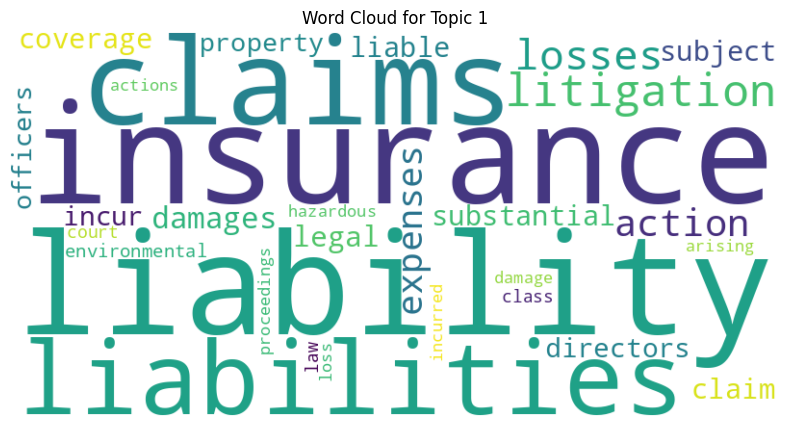

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


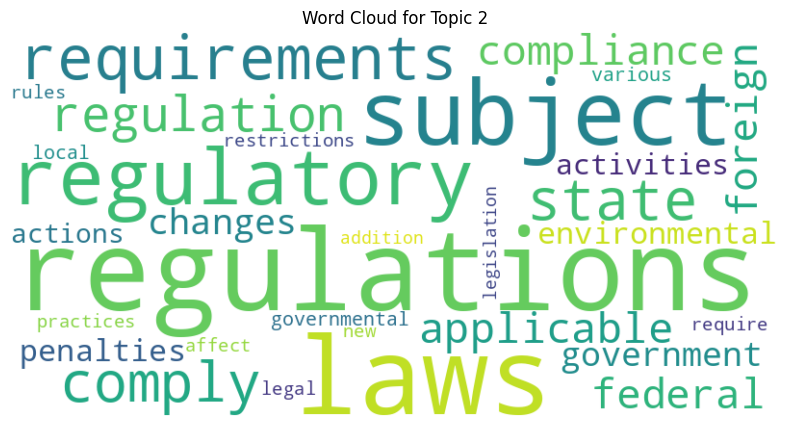

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


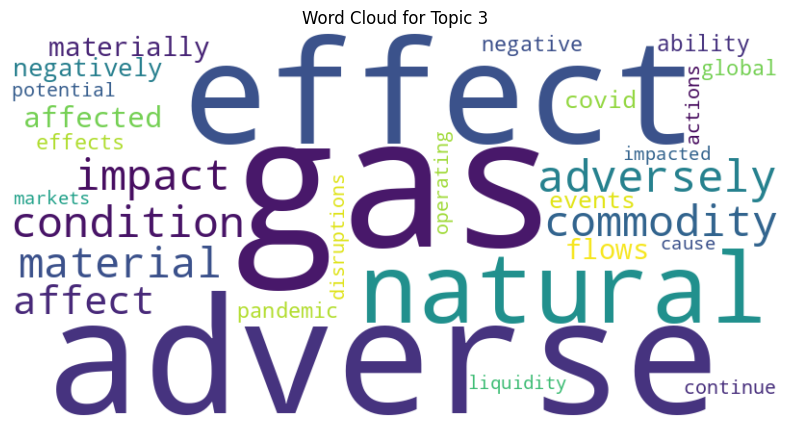

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


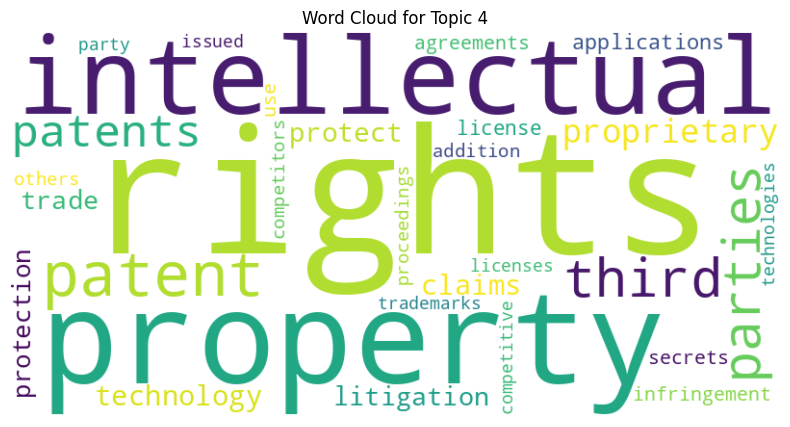

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


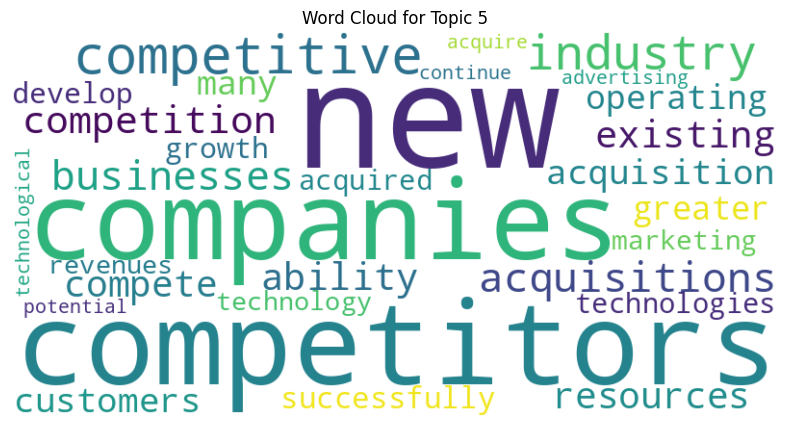

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


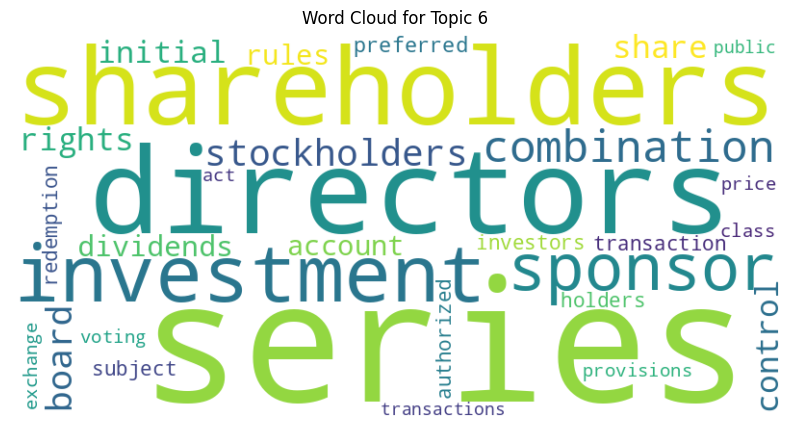

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


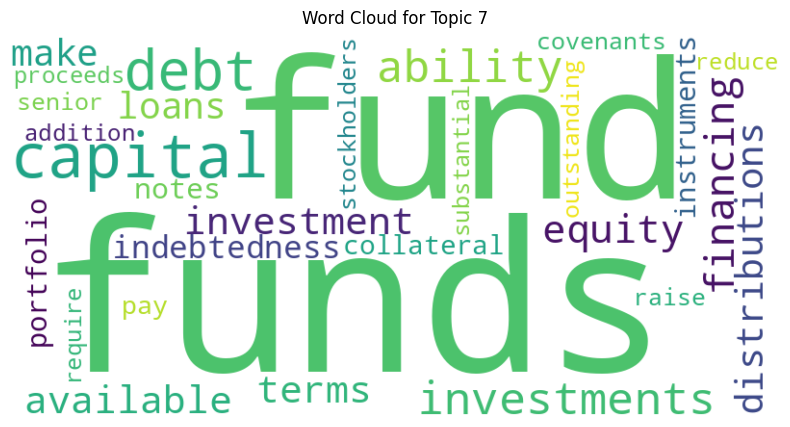

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


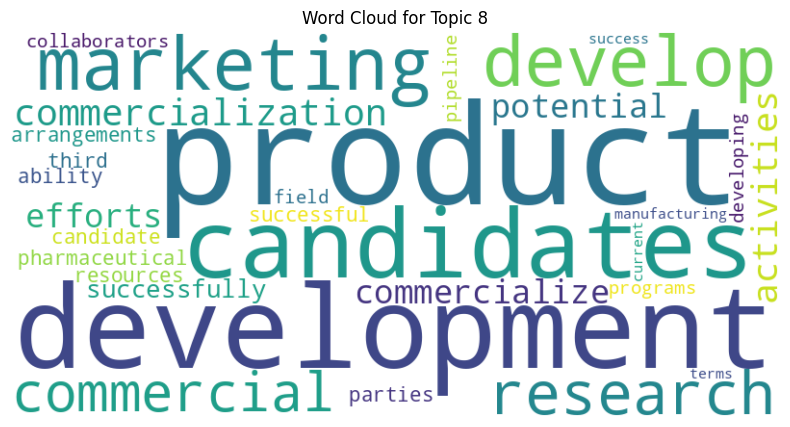

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


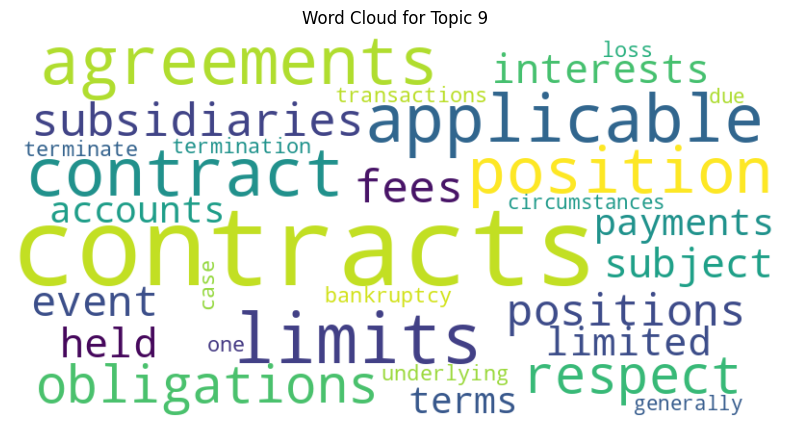

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


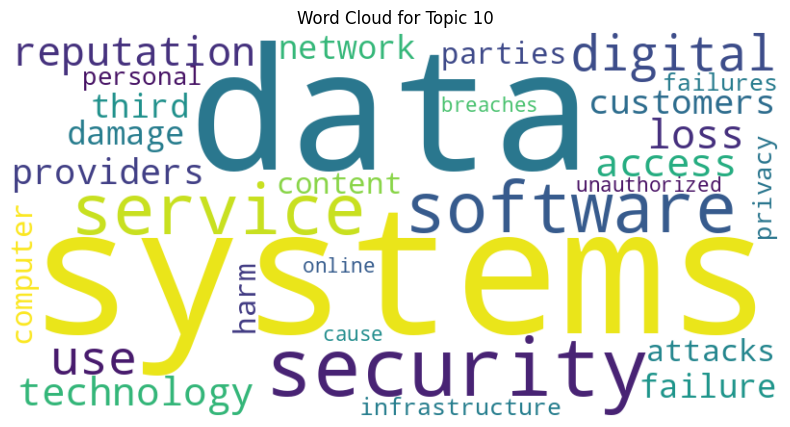

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


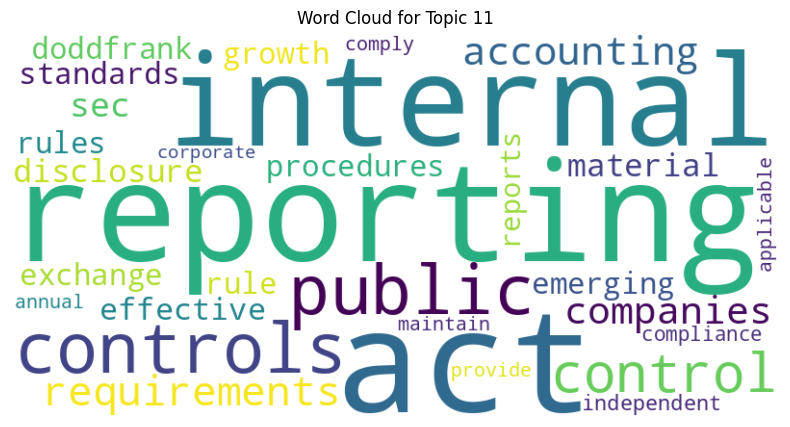

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


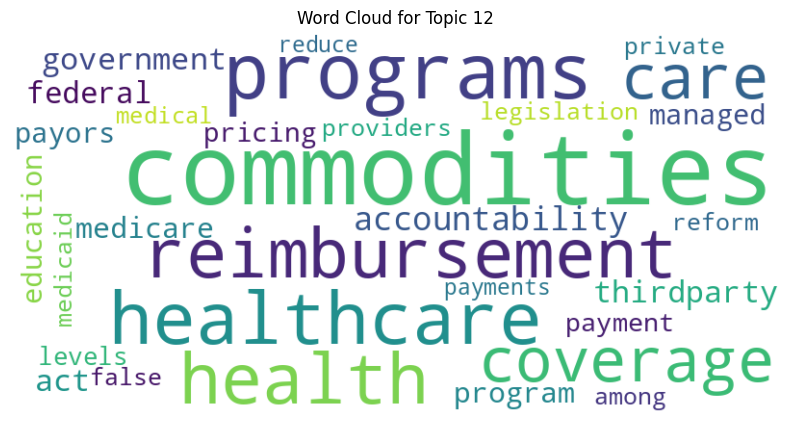

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


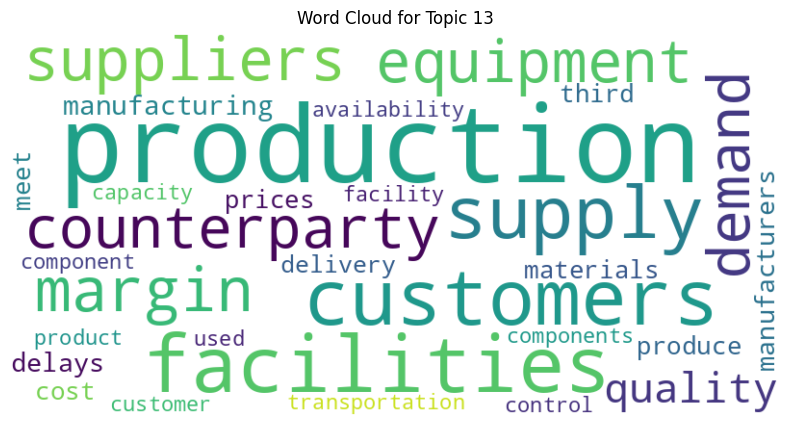

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


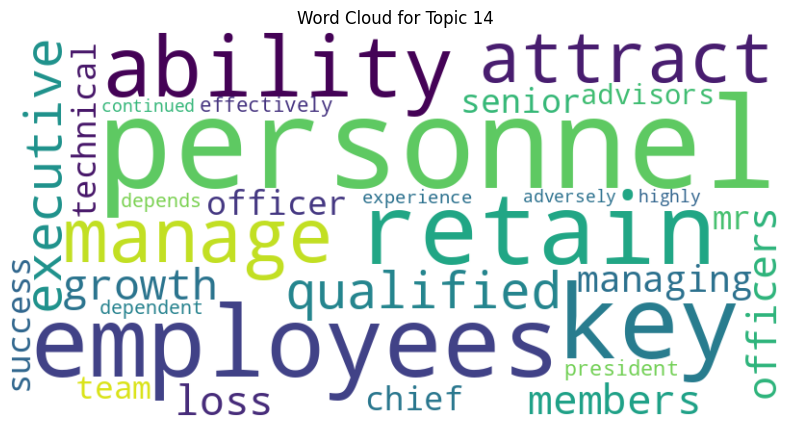

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


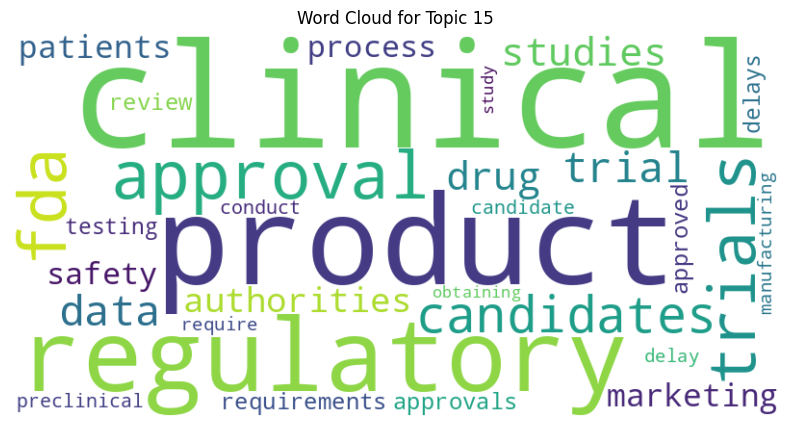

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


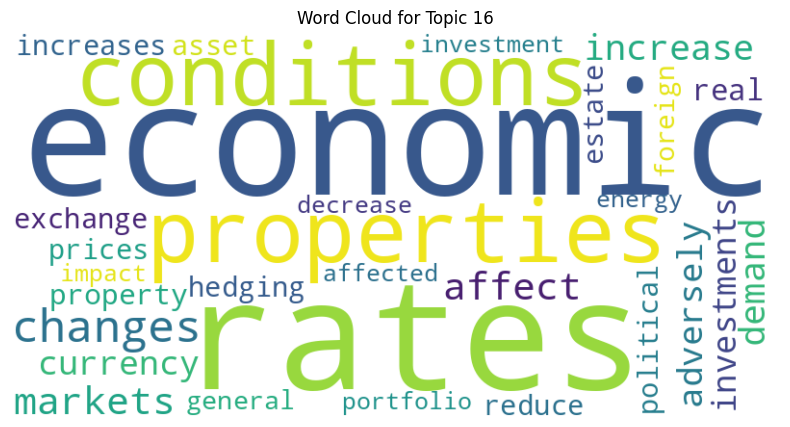

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


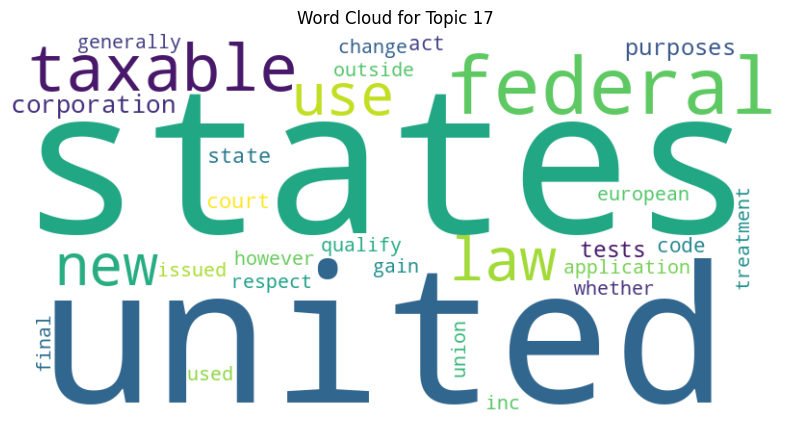

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


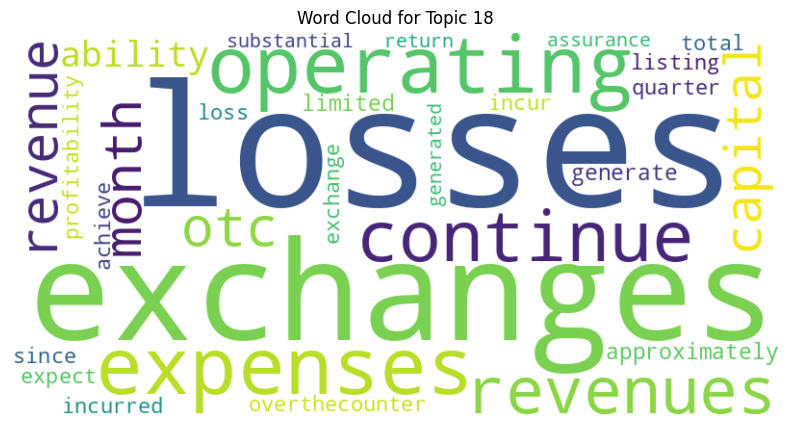

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


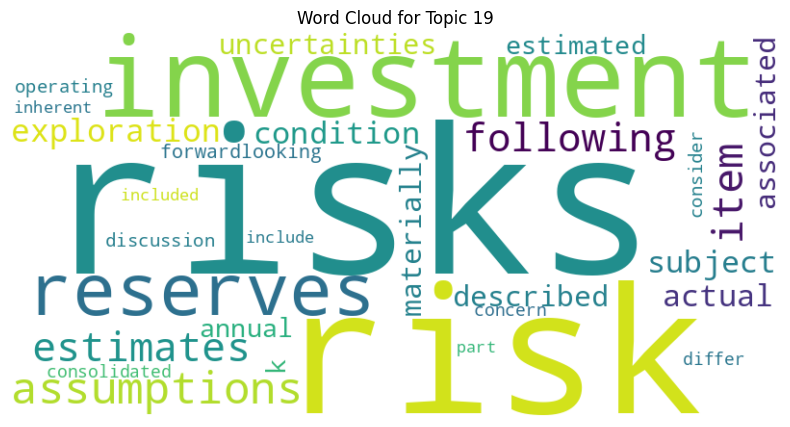

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Replace these with your LDA model and dictionary
lda_model = lda_model
dictionary = dictionary

# Define a function to generate and display a word cloud for a given topic
def generate_wordcloud_for_topic(topic_id, lda_model, dictionary):
    words = lda_model.show_topic(topic_id, topn=30)  # Adjust topn as needed
    word_freq = {word: prob for word, prob in words}

    # Create a WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white')

    # Generate the word cloud from the word frequency dictionary
    wordcloud.generate_from_frequencies(word_freq)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Topic {topic_id}")
    plt.axis("off")
    plt.show()

# Iterate over topics and generate word clouds for each
num_topics = lda_model.num_topics
for topic_id in range(0,num_topics):
    generate_wordcloud_for_topic(topic_id, lda_model, dictionary)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cm

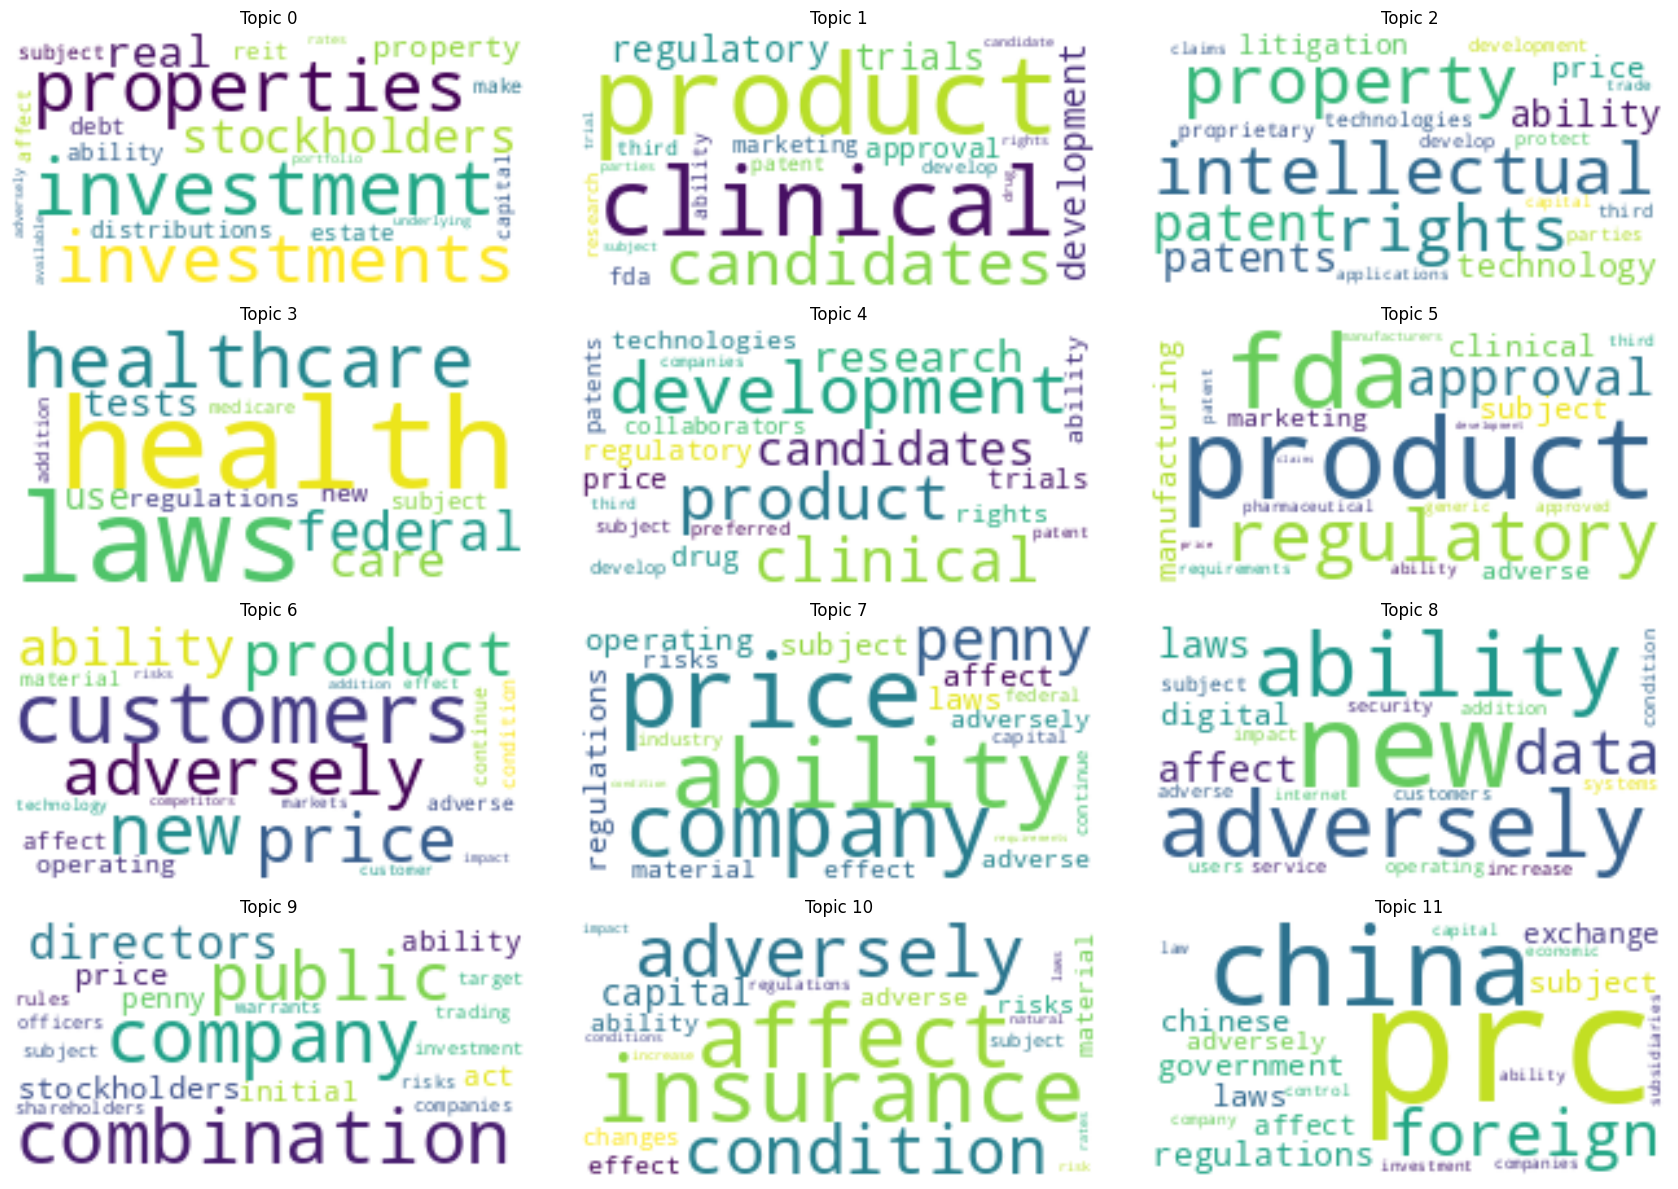

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.ticker import MaxNLocator

# Replace these with your LDA model and dictionary
lda_model = lda_model
dictionary = dictionary

# Define a function to generate and display a word cloud for a given topic
def generate_wordcloud_for_topic(topic_id, lda_model, dictionary, ax):
    words = lda_model.show_topic(topic_id, topn=20)  # Adjust topn as needed
    word_freq = {word: prob for word, prob in words}

    # Create a WordCloud object
    wordcloud = WordCloud(width=200, height=100, background_color='white', margin=2)

    # Generate the word cloud from the word frequency dictionary
    wordcloud.generate_from_frequencies(word_freq)

    # Plot the word cloud on the specified axis
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f"Topic {topic_id}")
    ax.axis("off")

# Create a 4x6 grid of subplots for 24 topics
num_rows, num_cols = 10, 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5)  # Adjust the vertical spacing between subplots

# Iterate over topics and generate word clouds for each
num_topics = lda_model.num_topics
for topic_id, ax in enumerate(axes.flat):
    if topic_id < num_topics:
        generate_wordcloud_for_topic(topic_id, lda_model, dictionary, ax)
    else:
        ax.axis('off')  # Turn off empty subplots if there are fewer than 24 topics

# Remove any remaining empty subplots
for i in range(num_topics, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Ensure x and y axis labels are not displayed
for ax in axes.flatten():
    ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

plt.tight_layout()
plt.show()
